# Importing Libraries

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report,
                             ConfusionMatrixDisplay, roc_auc_score, roc_curve, auc)

from tqdm import tqdm
import time
import warnings
warnings.filterwarnings('ignore')

# Data Understanding

In [2]:
df = pd.read_csv('/content/gender_classification_v7.csv')
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [4]:
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


gender
Female    2501
Male      2500
Name: count, dtype: int64


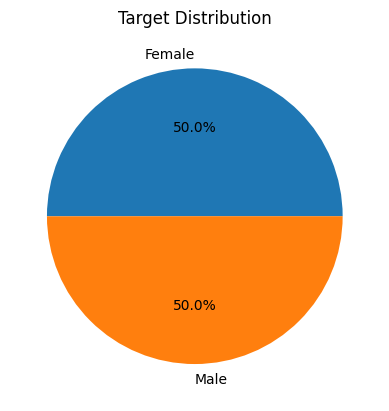

In [5]:
gender_counts = df['gender'].value_counts()
print(gender_counts)

plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Target Distribution')
plt.show()

# Data Cleaning

## Drop Duplicates

In [6]:
df.duplicated().sum()

np.int64(1768)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.reset_index(drop=True, inplace=True)

gender
Male      1783
Female    1450
Name: count, dtype: int64


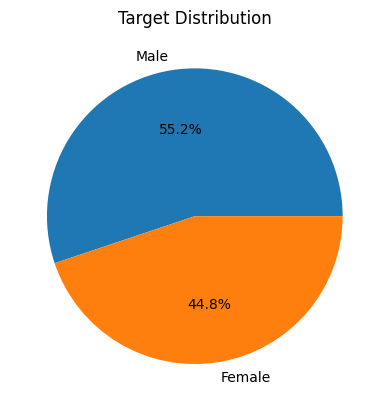

In [9]:
gender_counts = df['gender'].value_counts()
print(gender_counts)

plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Target Distribution')
plt.show()

# Exploratory Data Analysis (EDA)

In [10]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


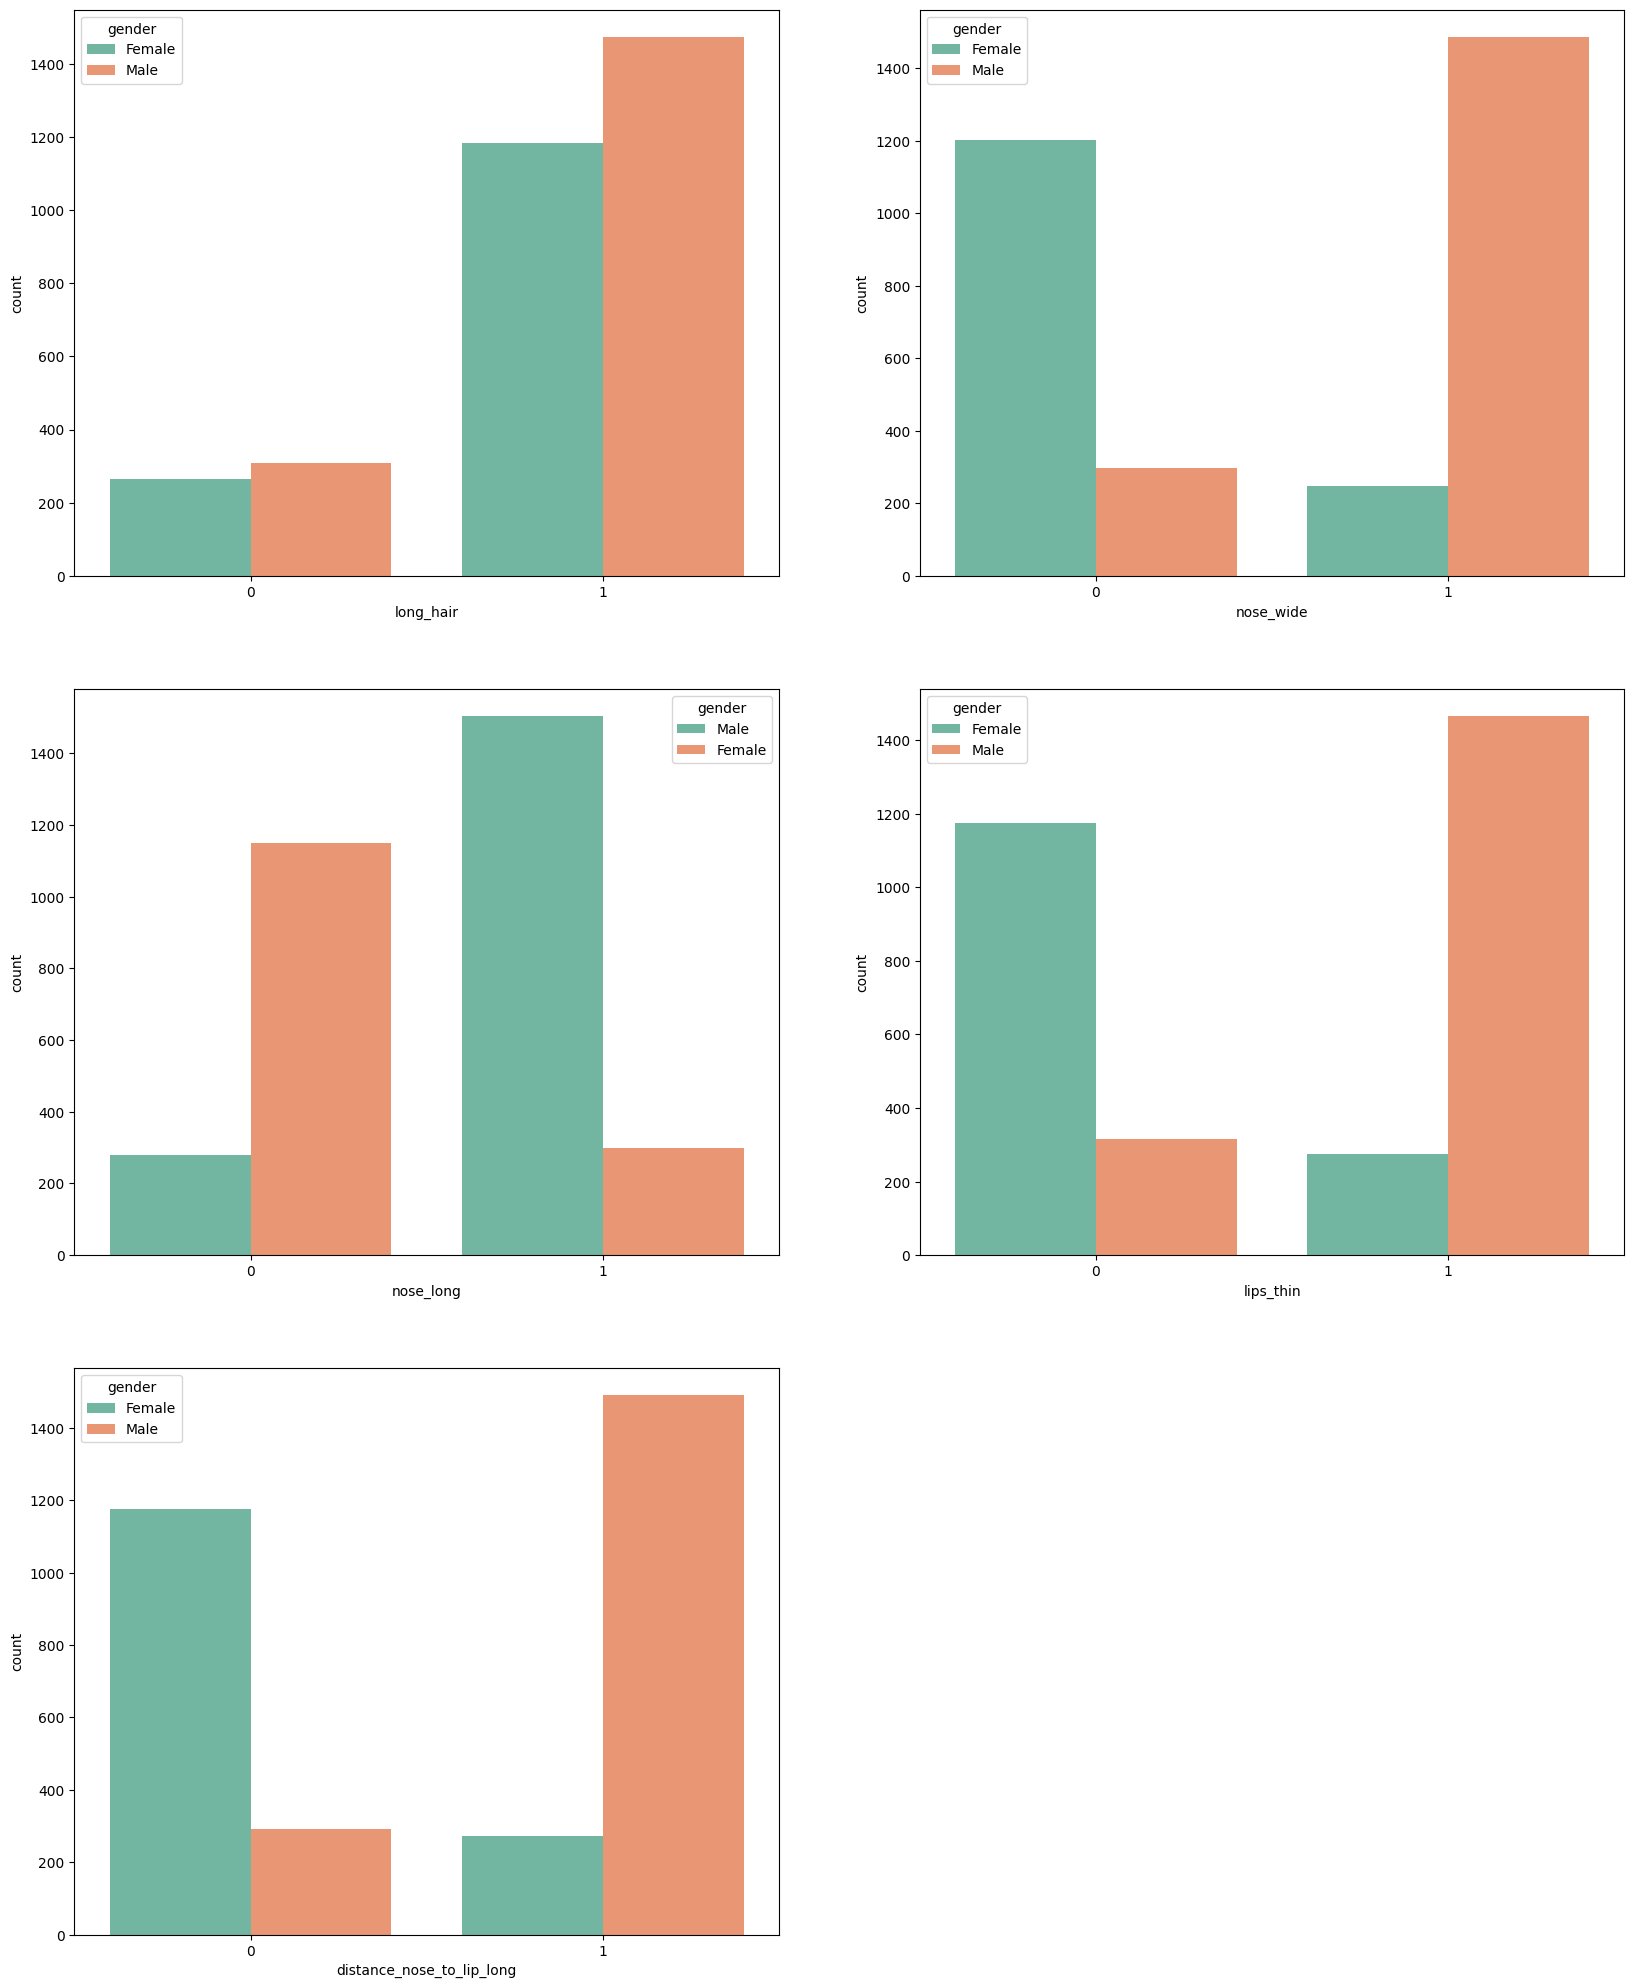

In [11]:
plt.figure(figsize=(20,25))
for i,col in enumerate(['long_hair', 'nose_wide', 'nose_long', 'lips_thin', 'distance_nose_to_lip_long']):
  plt.subplot(3, 2, i+1)
  sns.countplot(x=col , data=df,palette='Set2', hue='gender')


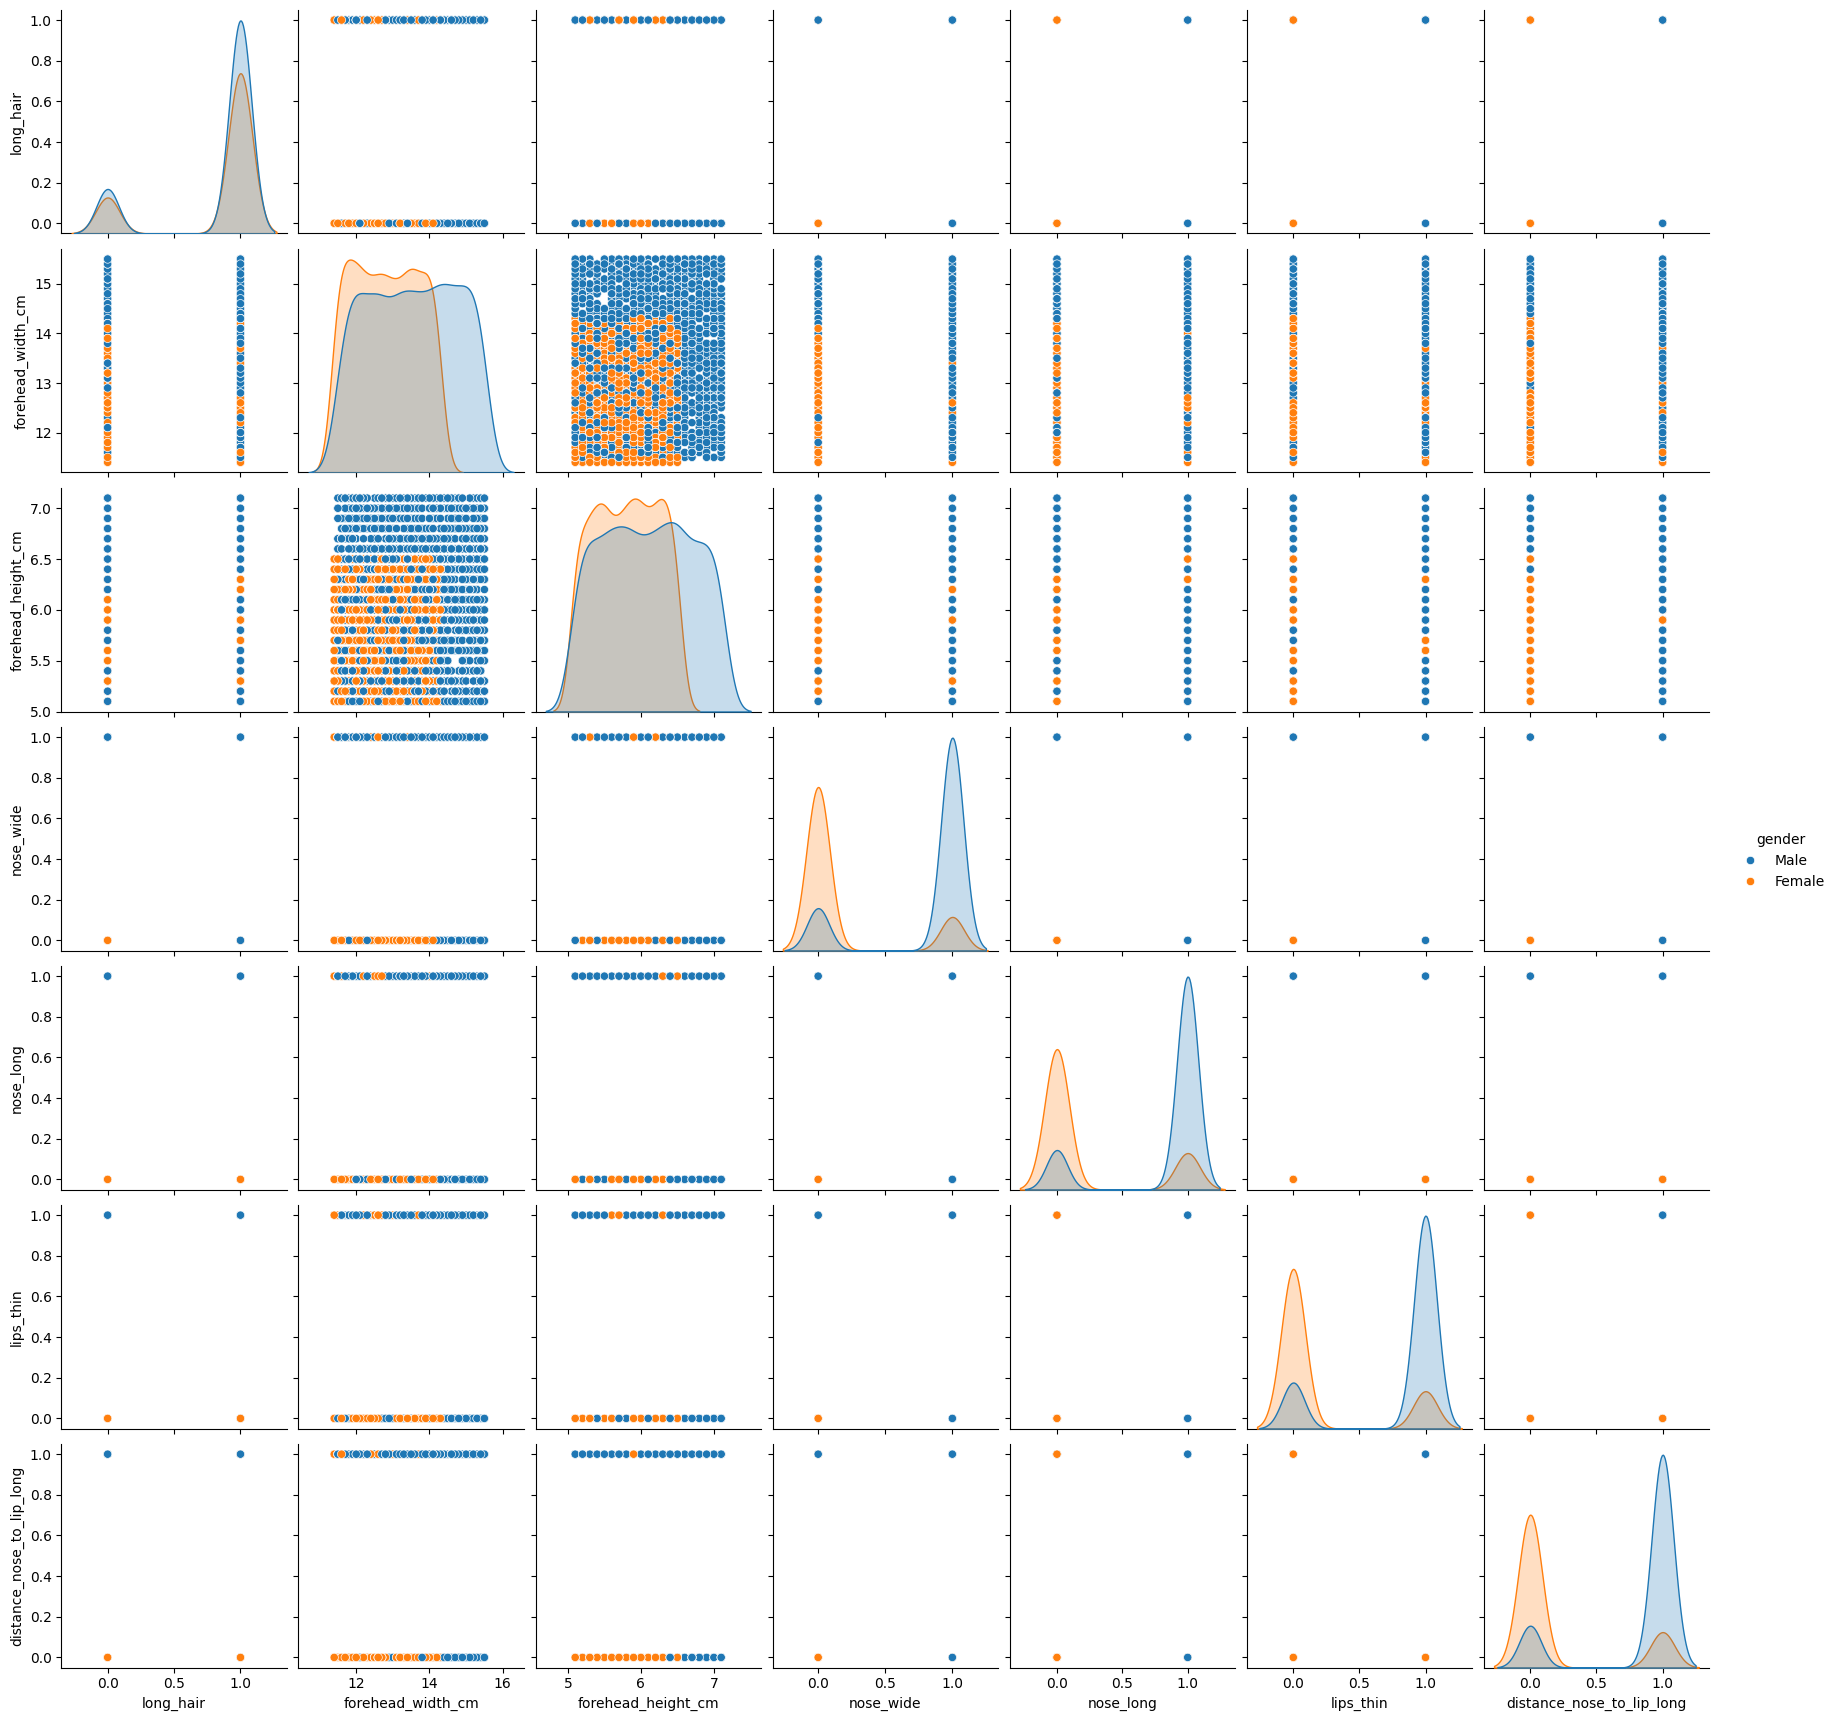

In [12]:
sns.pairplot(df, hue='gender')

# Data Preprocessing

## Data Encoding

In [13]:
lb = LabelEncoder()
df['gender'] = lb.fit_transform(df['gender'])

# Spliting

In [14]:
X = df.drop('gender', axis=1)
Y = df['gender']

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2, random_state=42, stratify=Y)

In [16]:
X_train.shape, X_test.shape

((2586, 7), (647, 7))

# Modeling

In [73]:
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()

}

In [74]:
Results = dict()
for model_name, model in tqdm(models.items()):
  start_time = time.time()

  model.fit(X_train, Y_train)
  y_pred = model.predict(X_test)
  y_proba = model.predict_proba(X_test)[:, 1]

  end_time = time.time()
  execution_time = end_time - start_time

  accuracy = accuracy_score(Y_test, y_pred)
  auc_score = roc_auc_score(Y_test, y_proba)
  recall = recall_score(Y_test, y_pred)
  precision = precision_score(Y_test, y_pred)
  f1 = f1_score(Y_test, y_pred)
  conf_matrix = confusion_matrix(Y_test, y_pred)
  class_report = classification_report(Y_test, y_pred)

  fpr, tpr, thresholds = roc_curve(Y_test, y_proba)
  roc_auc = auc(fpr, tpr)

  Results[model_name] = {
      'Accuracy': accuracy,
      'Recall': recall,
      'Precision': precision,
      'F1 Score': f1,
      'Execution Time': execution_time,
      'Confusion Matrix': conf_matrix,
      'Classification Report': class_report,
      'AUC Score': auc_score,
      'FPR': fpr,
      'TPR': tpr
  }


100%|██████████| 4/4 [00:01<00:00,  3.93it/s]


In [75]:
summary_Df = dict()
for model_name, metrics in Results.items():
  summary_Df[model_name] = {
      'Accuracy': round(metrics['Accuracy'] * 100, 2),
      'Recall': round(metrics['Recall'] * 100, 2),
      'Precision': round(metrics['Precision'] * 100, 2),
      'F1 Score': round(metrics['F1 Score'] * 100, 2),
      'AUC Score': round(metrics['AUC Score'],4),
      'Time(sec)': round(metrics['Execution Time'],4)
  }

summary_Df = pd.DataFrame(summary_Df).T
summary_Df

,Accuracy,Recall,Precision,F1 Score,AUC Score,Time(sec)
Logistic Regression,94.28,95.80,93.96,94.87,0.9900,0.0242
SVM,94.90,96.36,94.51,95.42,0.9904,0.5179
Decision Tree,92.89,94.68,92.60,93.63,0.9267,0.0086
Random Forest,95.21,97.20,94.29,95.72,0.9881,0.3621


Logistic Regression Report
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       290
           1       0.94      0.96      0.95       357

    accuracy                           0.94       647
   macro avg       0.94      0.94      0.94       647
weighted avg       0.94      0.94      0.94       647

SVM Report
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       290
           1       0.95      0.96      0.95       357

    accuracy                           0.95       647
   macro avg       0.95      0.95      0.95       647
weighted avg       0.95      0.95      0.95       647

Decision Tree Report
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       290
           1       0.93      0.95      0.94       357

    accuracy                           0.93       647
   macro avg       0.93      0.93      0.93       647
weighted avg   

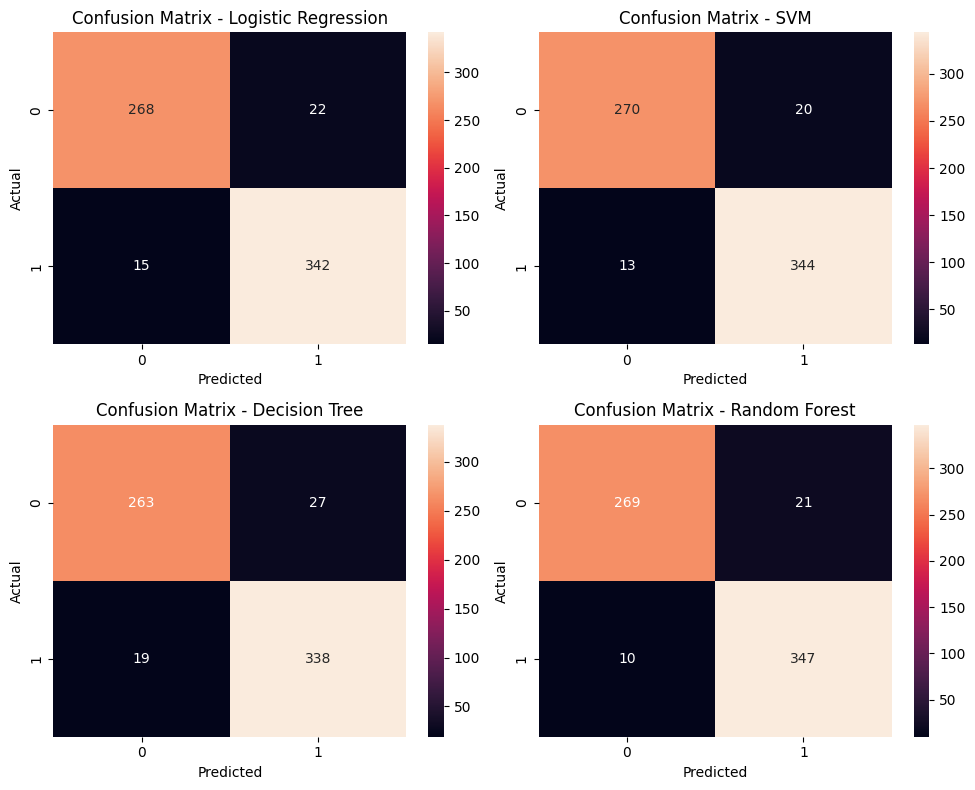

In [78]:
plt.figure(figsize=(10,8))
i=1
for model_name, metrics in Results.items():
  plt.subplot(2, 2, i)
  print(f'{model_name} Report')
  print(metrics['Classification Report'])
  sns.heatmap(metrics['Confusion Matrix'], annot=True, fmt='d')
  plt.title(f'Confusion Matrix - {model_name}')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.tight_layout()
  i+=1

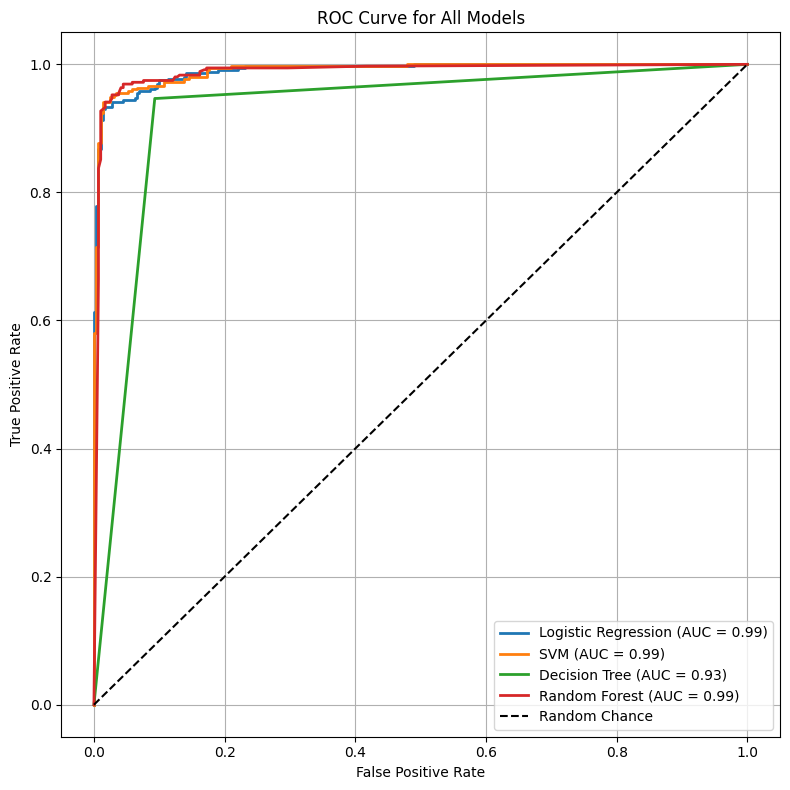

In [79]:
plt.figure(figsize=(8, 8))
for model_name, metrics in Results.items():
    plt.plot(metrics['FPR'], metrics['TPR'], label=f"{model_name} (AUC = {metrics['AUC Score']:.2f})", linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')

plt.title("ROC Curve for All Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


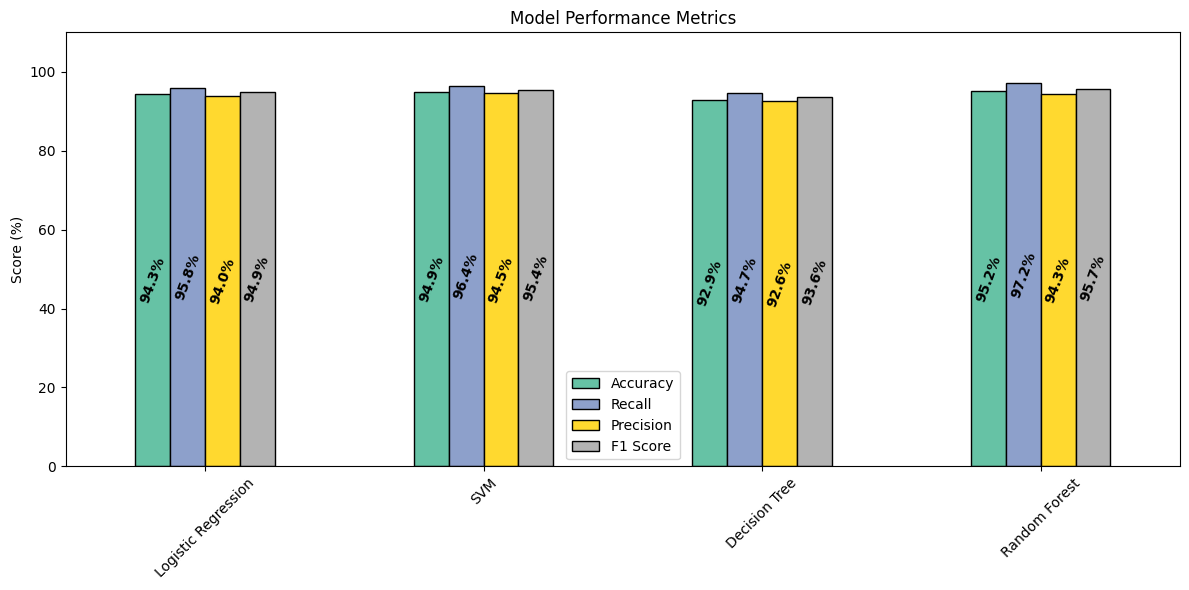

In [89]:
metric_cols = ['Accuracy', 'Recall', 'Precision', 'F1 Score']
summary_metrics = summary_Df[metric_cols]

ax = summary_metrics.plot(kind='bar', figsize=(12, 6), colormap='Set2', edgecolor='black')
plt.title('Model Performance Metrics')
plt.ylabel('Score (%)')
plt.xticks(rotation=45)
plt.ylim(0, 110)


for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', rotation=70, color='black', fontsize=10, weight='bold')

plt.tight_layout()
plt.show()


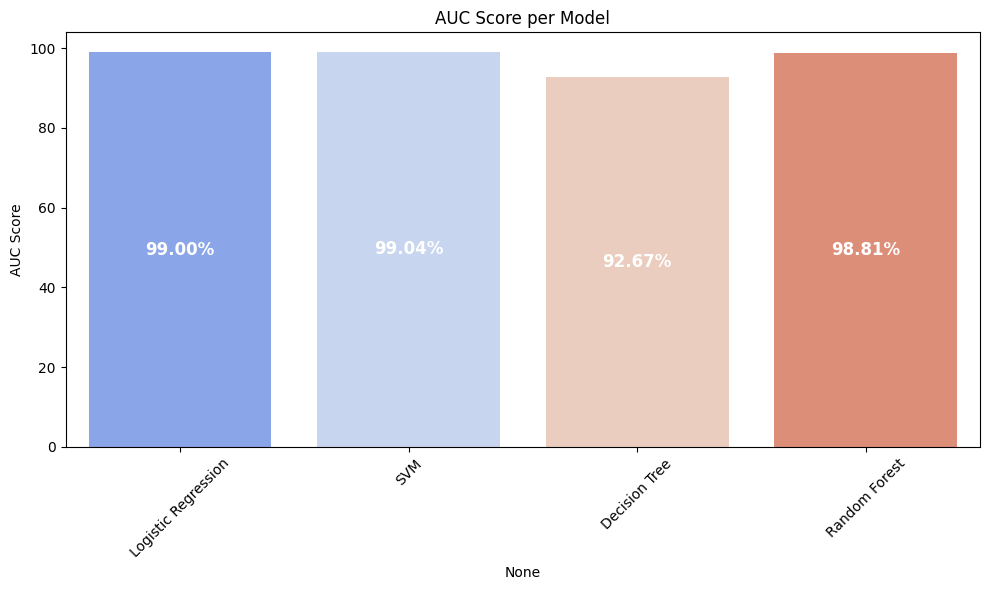

In [81]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=summary_Df.index, y=summary_Df['AUC Score']*100, data=summary_Df, palette='coolwarm')

plt.title('AUC Score per Model')
plt.ylabel('AUC Score')
plt.xticks(rotation=45)
plt.tight_layout()

for container in ax.containers:
  ax.bar_label(container, fmt='%.2f%%', label_type='center', color='white', fontsize=12, weight='bold')

plt.show()


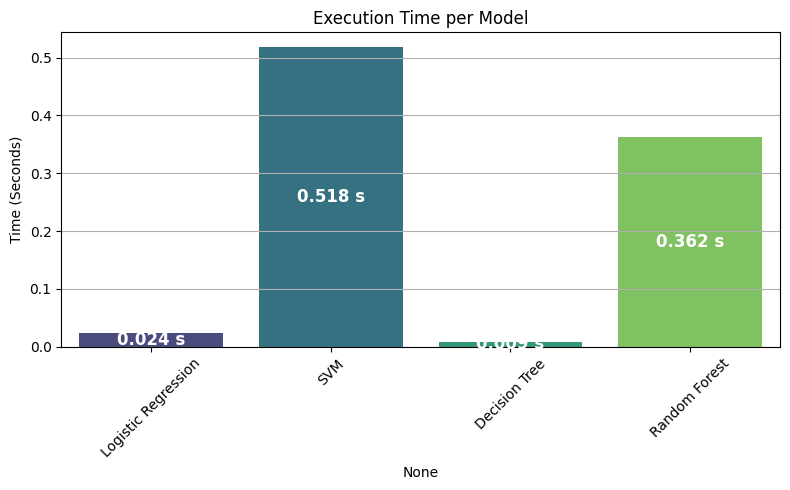

In [88]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=summary_Df.index, y='Time(sec)', data=summary_Df,palette='viridis')

plt.title('Execution Time per Model')
plt.ylabel('Time (Seconds)')
plt.xticks(rotation=45)
plt.grid(axis='y')

for container in ax.containers:
    ax.bar_label(container, fmt='%.3f s', label_type='center', color='white', fontsize=12, weight='bold')

plt.tight_layout()
plt.show()


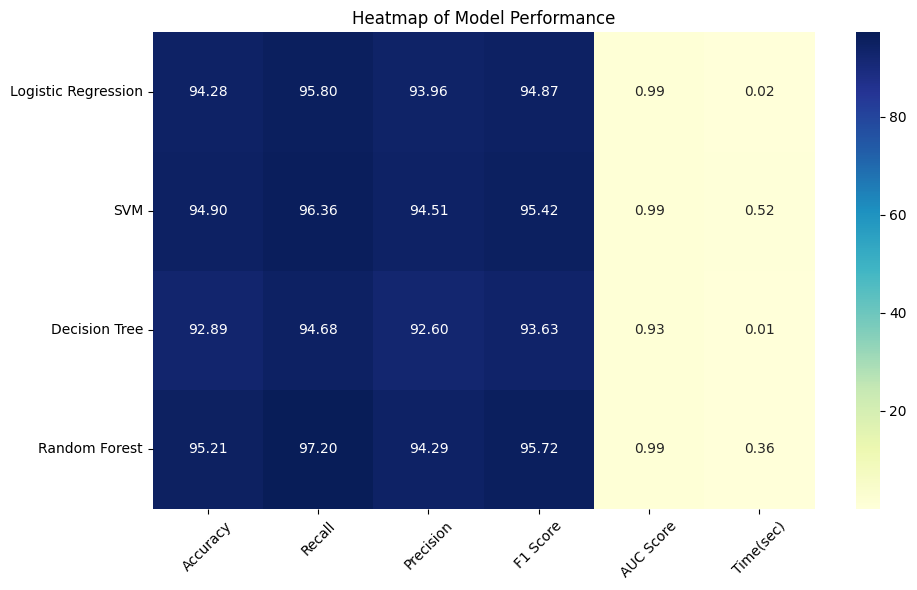

In [83]:
plt.figure(figsize=(10, 6))
sns.heatmap(summary_Df, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Heatmap of Model Performance')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
